In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [34]:
df=pd.read_csv("lok_sabha_data.csv")
df

,Party,Constituency,Parliament Constituency,Winning Candidate,Total Votes,Margin
0,Andhra Pradesh,Telugu Desam,Srikakulam(2),KINJARAPU RAMMOHAN NAIDU,754328,327901
1,Andhra Pradesh,Telugu Desam,Vizianagaram(3),APPALANAIDU KALISETTI,743113,249351
2,Andhra Pradesh,Telugu Desam,Visakhapatnam(4),SRIBHARAT MATHUKUMILI,907467,504247
3,Andhra Pradesh,Telugu Desam,Amalapuram (SC)(7),G M HARISH (BALAYOGI),796981,342196
4,Andhra Pradesh,Telugu Desam,Eluru(10),PUTTA MAHESH KUMAR,746351,181857
...,...,...,...,...,...,...
539,West Bengal,Bharatiya Janata Party,Tamluk(30),ABHIJIT GANGOPADHYAY,765584,77733
540,West Bengal,Bharatiya Janata Party,Kanthi(31),ADHIKARI SOUMENDU,763195,47764
541,West Bengal,Bharatiya Janata Party,Purulia(35),JYOTIRMAY SINGH MAHATO,578489,17079
542,West Bengal,Bharatiya Janata Party,Bishnupur(37),KHAN SAUMITRA,680130,5567


In [35]:
import pandas as pd

# Assuming your dataframe is named df
df.rename(columns={'Party': 'State', 'Constituency': 'Party'}, inplace=True)

# Display the updated dataframe
print(df.head())  # Display the first few rows to verify the change



            State         Party Parliament Constituency  \
0  Andhra Pradesh  Telugu Desam           Srikakulam(2)   
1  Andhra Pradesh  Telugu Desam         Vizianagaram(3)   
2  Andhra Pradesh  Telugu Desam        Visakhapatnam(4)   
3  Andhra Pradesh  Telugu Desam      Amalapuram (SC)(7)   
4  Andhra Pradesh  Telugu Desam               Eluru(10)   

          Winning Candidate Total Votes  Margin  
0  KINJARAPU RAMMOHAN NAIDU      754328  327901  
1     APPALANAIDU KALISETTI      743113  249351  
2     SRIBHARAT MATHUKUMILI      907467  504247  
3     G M HARISH (BALAYOGI)      796981  342196  
4        PUTTA MAHESH KUMAR      746351  181857  


In [37]:
print("Initial Data Preview:")
print(df.head())

Initial Data Preview:
            State         Party Parliament Constituency  \
0  Andhra Pradesh  Telugu Desam           Srikakulam(2)   
1  Andhra Pradesh  Telugu Desam         Vizianagaram(3)   
2  Andhra Pradesh  Telugu Desam        Visakhapatnam(4)   
3  Andhra Pradesh  Telugu Desam      Amalapuram (SC)(7)   
4  Andhra Pradesh  Telugu Desam               Eluru(10)   

          Winning Candidate Total Votes  Margin  
0  KINJARAPU RAMMOHAN NAIDU      754328  327901  
1     APPALANAIDU KALISETTI      743113  249351  
2     SRIBHARAT MATHUKUMILI      907467  504247  
3     G M HARISH (BALAYOGI)      796981  342196  
4        PUTTA MAHESH KUMAR      746351  181857  


# **Lok Sabha data Analysis :**

In [38]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
State                      0
Party                      0
Parliament Constituency    0
Winning Candidate          0
Total Votes                0
Margin                     0
dtype: int64


In [39]:
df = df.drop_duplicates()

In [40]:
# 1.4 Standardize Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [41]:
print("\nCleaned Data Preview:")
print(df.head())


Cleaned Data Preview:
            state         party parliament_constituency  \
0  Andhra Pradesh  Telugu Desam           Srikakulam(2)   
1  Andhra Pradesh  Telugu Desam         Vizianagaram(3)   
2  Andhra Pradesh  Telugu Desam        Visakhapatnam(4)   
3  Andhra Pradesh  Telugu Desam      Amalapuram (SC)(7)   
4  Andhra Pradesh  Telugu Desam               Eluru(10)   

          winning_candidate total_votes  margin  
0  KINJARAPU RAMMOHAN NAIDU      754328  327901  
1     APPALANAIDU KALISETTI      743113  249351  
2     SRIBHARAT MATHUKUMILI      907467  504247  
3     G M HARISH (BALAYOGI)      796981  342196  
4        PUTTA MAHESH KUMAR      746351  181857  


# **Describing data** :

In [42]:
df.describe()

,state,party,parliament_constituency,winning_candidate,total_votes,margin
count,543,543,543,543,543,543
unique,36,45,543,542,542,543
top,Uttar Pradesh,Bharatiya Janata Party,Srikakulam(2),RAHUL GANDHI,692832,327901
freq,80,238,1,2,2,1


In [43]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                state                   party parliament_constituency  \
count             543                     543                     543   
unique             36                      45                     543   
top     Uttar Pradesh  Bharatiya Janata Party           Srikakulam(2)   
freq               80                     238                       1   

       winning_candidate total_votes  margin  
count                543         543     543  
unique               542         542     543  
top         RAHUL GANDHI      692832  327901  
freq                   2           2       1  


In [46]:
top_parties = df['party'].value_counts().head(10)
print("\nTop Parties:")
print(top_parties)



Top Parties:
party
Bharatiya Janata Party                              238
Indian National Congress                             99
Samajwadi Party                                      37
All India Trinamool Congress                         29
Dravida Munnetra Kazhagam                            22
Telugu Desam                                         16
Janata Dal (United)                                  12
Shiv Sena (Uddhav Balasaheb Thackrey)                 9
Nationalist Congress Party – Sharadchandra Pawar      8
Shiv Sena                                             7
Name: count, dtype: int64


In [50]:
# 2.3 Regional Analysis
regional_analysis = df.groupby('party')['total_votes'].sum().sort_values(ascending=False).head(10)
print("\nRegional Analysis (Top 10 parties by Total Votes):")
print(regional_analysis)


Regional Analysis (Top 10 parties by Total Votes):
party
 Bharatiya Janata Party                                                        881341777447
Asom Gana Parishad                                                                   860113
Janata Dal (Secular)                                                           851881691481
Bharat Adivasi Party                                                                 820831
All India Trinamool Congress              7883755444275245166824426287895202315285796920...
Bharatiya Janata Party                    7620697265157073431024362054171455818683878948...
Telugu Desam                              7543287431139074677969817463517941548649488079...
Janasena Party                                                                 729699724439
All India Majlis-E-Ittehadul Muslimeen                                               661981
Independent                                                                           65259
Name: total_votes, dty

In [51]:
# 2.4 Margin Analysis
print("\nMargin Analysis:")
print(df['margin'].describe())


Margin Analysis:
count        543
unique       543
top       327901
freq           1
Name: margin, dtype: object


In [14]:
import matplotlib.pyplot as plt

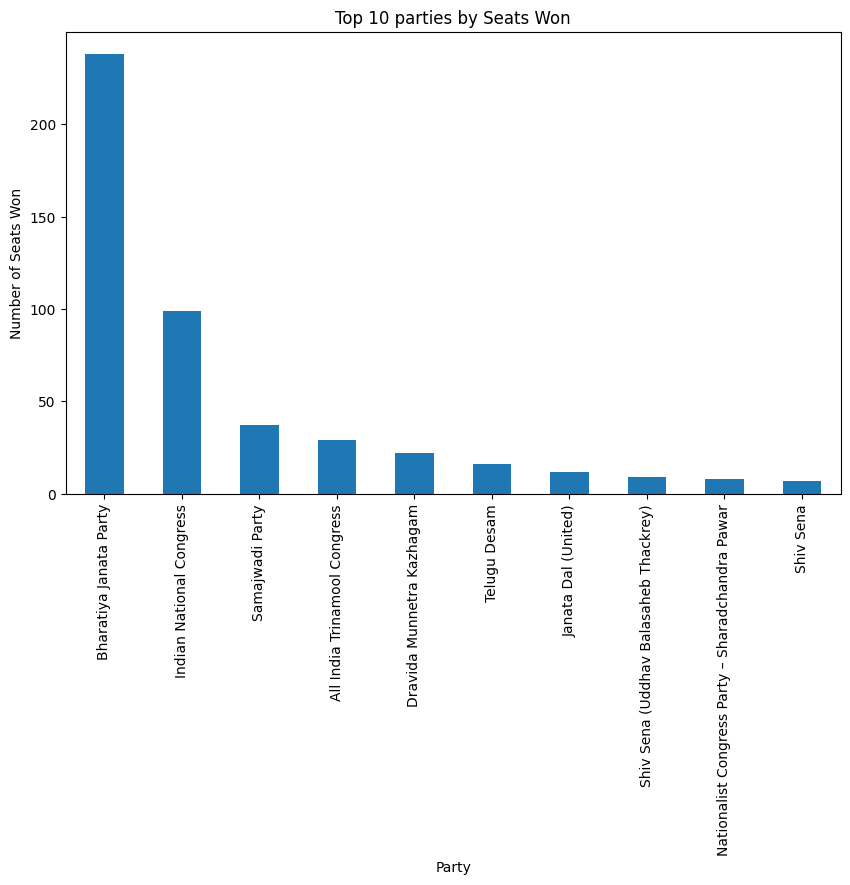

In [54]:
plt.figure(figsize=(10, 6))
top_parties.plot(kind='bar')
plt.title('Top 10 parties by Seats Won')
plt.xlabel('Party')
plt.ylabel('Number of Seats Won')
plt.show()

In [67]:
state_party_votes = df.groupby(['state', 'party'])['total_votes'].sum().reset_index()

idx = state_party_votes.groupby(['state'])['total_votes'].transform(max) == state_party_votes['total_votes']
parties_highest_influence = state_party_votes[idx][['state', 'party', 'total_votes']]

print("Parties with highest influence in each state:")
parties_highest_influence

Parties with highest influence in each state:


,state,party,total_votes
0,Andaman and Nicobar Islands,Bharatiya Janata Party,102436
1,Andhra Pradesh,Bharatiya Janata Party,762069726515707343
5,Arunachal Pradesh,Bharatiya Janata Party,205417145581
7,Assam,Bharatiya Janata Party,8683878948873346205450936524058970437757886631...
17,Bihar,Rashtriya Janata Dal,613283438345443035465567
18,Chandigarh,Indian National Congress,216657
19,Chhattisgarh,Bharatiya Janata Party,7132008082756781997249377120579564971050351703...
22,Dadra & Nagar Haveli and Daman & Diu,Independent,42523
23,Goa,Bharatiya Janata Party,257326
26,Gujarat,Indian National Congress,671883


In [69]:
party_counts = parties_highest_influence['party'].value_counts().reset_index()
party_counts.columns = ['party', 'Count_of_States']

print("Number of states where each party has the highest influence:")
party_counts

Number of states where each party has the highest influence:


,party,Count_of_States
0,Bharatiya Janata Party,13
1,Indian National Congress,10
2,Independent,2
3,Rashtriya Janata Dal,1
4,Janata Dal (Secular),1
5,Indian Union Muslim League,1
6,Independent,1
7,Voice of the People Party,1
8,Zoram People’s Movement,1
9,Bharat Adivasi Party,1


In [ ]:
total_votes_by_party = df.groupby('Party')['Total Votes'].sum()
total_votes = total_votes_by_party.sum()
vote_share = (total_votes_by_party / total_votes) * 100
top_10_vote_share = vote_share.sort_values(ascending=False).head(10)
print("Vote Share by Party:")
print(top_10_vote_share)

Vote Share by Party:
Party
Bharatiya Janata Party                              47.604432
Indian National Congress                            16.615791
All India Trinamool Congress                         6.184248
Samajwadi Party                                      5.768036
Telugu Desam                                         3.747804
Dravida Munnetra Kazhagam                            3.601323
Janata Dal (United)                                  1.940909
Nationalist Congress Party – Sharadchandra Pawar     1.523247
Shiv Sena (Uddhav Balasaheb Thackrey)                1.462255
Shiv Sena                                            1.168975
Name: Total Votes, dtype: float64
